<a href="https://colab.research.google.com/github/BACHUBHAVANA/CodSoft-Datascience/blob/main/MOVIE_RATING_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 1.8406582329860695
R-squared: 0.02442829471880359


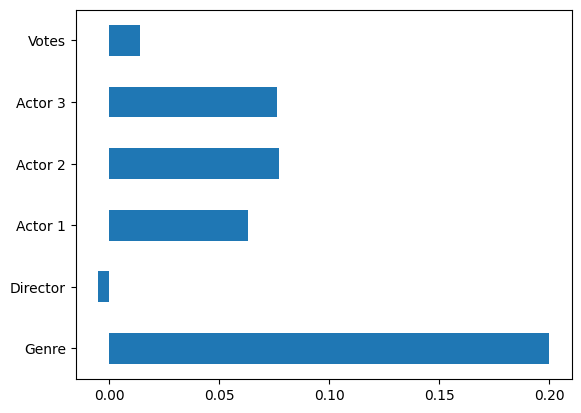

[5.89472421]


['movie_rating_model.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the dataset
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='ISO-8859-1')

# Drop rows with missing values in crucial columns
df.dropna(subset=['Rating', 'Genre', 'Director', 'Actor 1'], inplace=True)

# Handle non-numeric data
# Convert 'Votes' to numeric
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df.dropna(subset=['Votes'], inplace=True)  # Drop rows where 'Votes' is NaN

# Encoding categorical features
label_encoder_genre = LabelEncoder()
df['Genre'] = label_encoder_genre.fit_transform(df['Genre'])
label_encoder_director = LabelEncoder()
df['Director'] = label_encoder_director.fit_transform(df['Director'])
label_encoder_actor1 = LabelEncoder()
df['Actor 1'] = label_encoder_actor1.fit_transform(df['Actor 1'])
label_encoder_actor2 = LabelEncoder()
df['Actor 2'] = label_encoder_actor2.fit_transform(df['Actor 2'])
label_encoder_actor3 = LabelEncoder()
df['Actor 3'] = label_encoder_actor3.fit_transform(df['Actor 3'])

# Create feature and target variables
X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes']]
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

# Plot feature importance
feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance.plot(kind='barh')
plt.show()

# Example of making a prediction
# Replace with actual values
new_movie = pd.DataFrame({
    'Genre': [label_encoder_genre.transform(['Drama'])[0]],  # Example encoding
    'Director': [label_encoder_director.transform(['Gaurav Bakshi'])[0]],
    'Actor 1': [label_encoder_actor1.transform(['Rasika Dugal'])[0]],
    'Actor 2': [label_encoder_actor2.transform(['Vivek Ghamande'])[0]],
    'Actor 3': [label_encoder_actor3.transform(['Arvind Jangid'])[0]],
    'Votes': [10]  # Example votes
})
new_movie_scaled = scaler.transform(new_movie)
predicted_rating = model.predict(new_movie_scaled)
print(predicted_rating)

# Save the model
joblib.dump(model, 'movie_rating_model.pkl')
